# Oasis Infobyte - Data Science - April


### Task 3 : Car Price Prediction Using Machine Learning
### Author :k. Tulasi kumar

# Problem Statement :

The price of a car depends on a lot of factors like goodwill of the brand of the car, features of the car, horsepower and mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset :

In [2]:
car_df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [3]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#checking the shape of the data
car_df.shape

(205, 26)

### Data Information :

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observation :**
              There are no **null values** in the dataset and each **feature** seems to have correct **dtype**.

### Data Description :

In [6]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Observation :**
- From the above description clearly it can be seen that data has **outliers**.
              

### Data Cleaning and Preparation : 

In [7]:
car_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
#Dropping the car_id and CarName column
car_df.drop(['car_ID', 'CarName'], axis = 1, inplace = True)

In [9]:
#Dropping the duplicates
car_df.drop_duplicates(inplace = True)

In [10]:
#Checking the shape of the data after dropping the duplicates
car_df.shape

(204, 24)

### Exploratory Data Analysis :

<AxesSubplot:xlabel='fueltype', ylabel='count'>

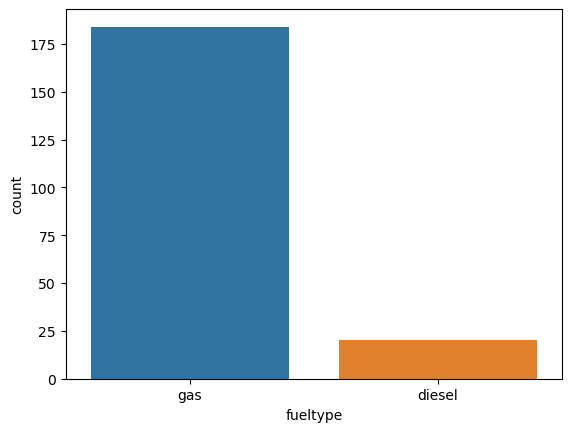

In [11]:
sns.countplot(car_df['fueltype'])

<AxesSubplot:xlabel='aspiration', ylabel='count'>

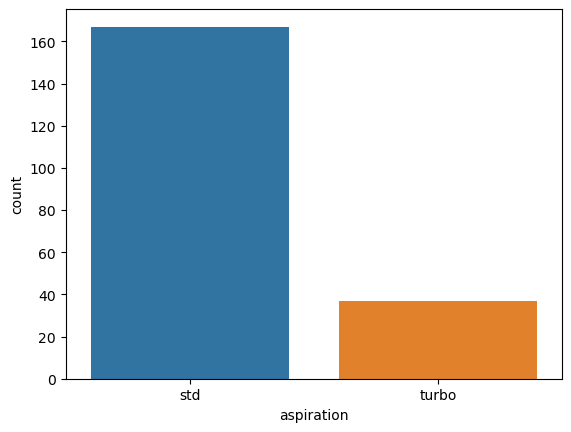

In [12]:
sns.countplot(car_df['aspiration'])

<AxesSubplot:xlabel='carbody', ylabel='count'>

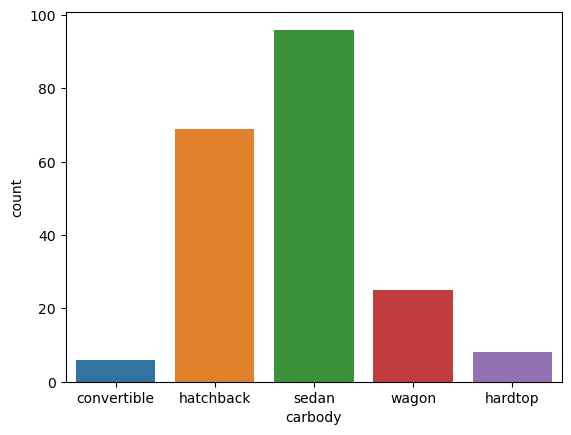

In [13]:
sns.countplot(car_df['carbody'])

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

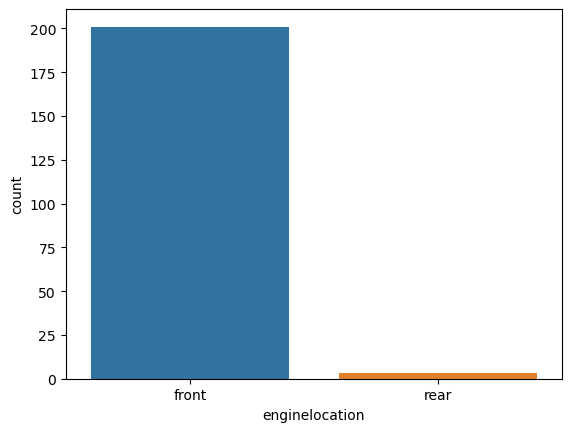

In [14]:
sns.countplot(car_df['enginelocation'])

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

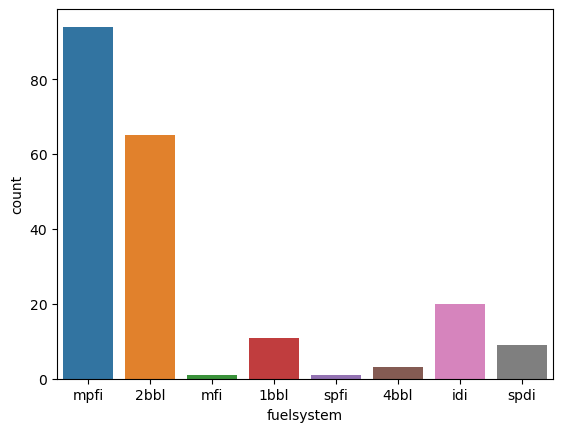

In [15]:
sns.countplot(car_df['fuelsystem'])

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

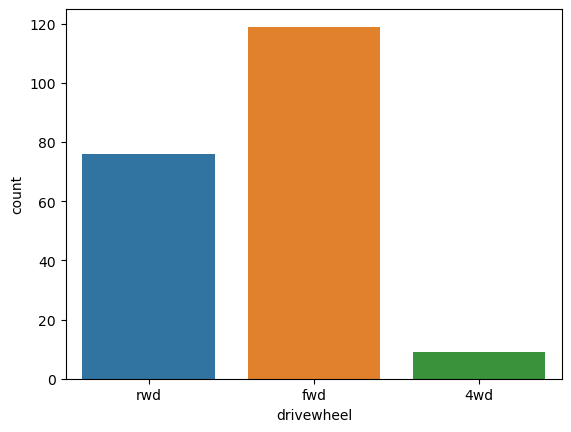

In [16]:
sns.countplot(car_df['drivewheel'])

Text(0.5, 1.0, 'Car Price Distribution')

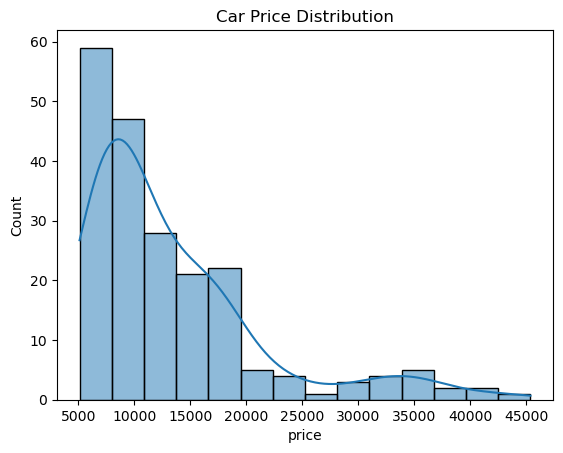

In [17]:
sns.histplot(car_df['price'], kde = True)
plt.title('Car Price Distribution')

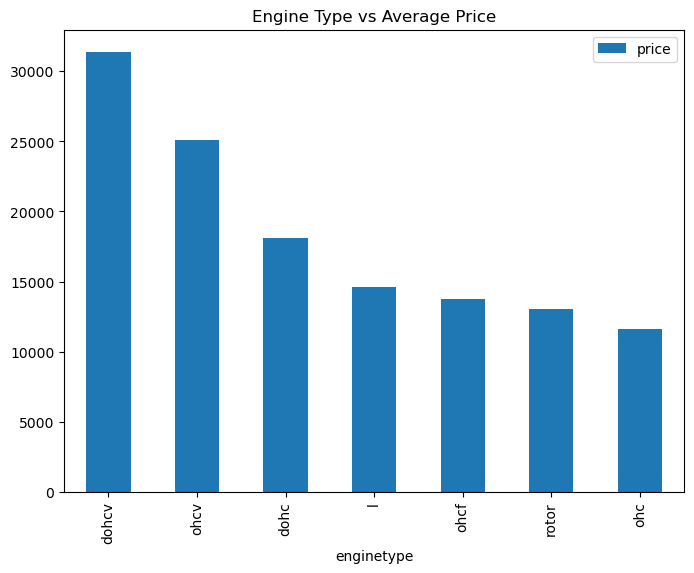

In [18]:
df = pd.DataFrame(car_df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

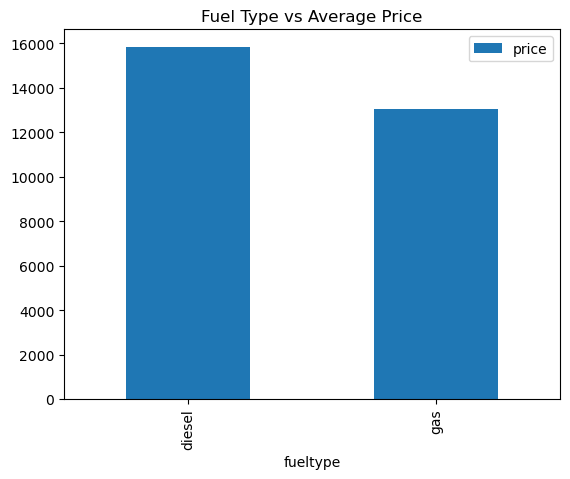

In [19]:
df = pd.DataFrame(car_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

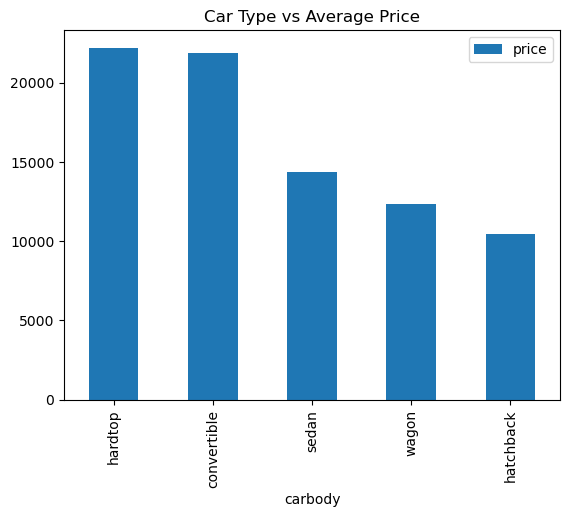

In [20]:
df = pd.DataFrame(car_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

<AxesSubplot:xlabel='symboling', ylabel='count'>

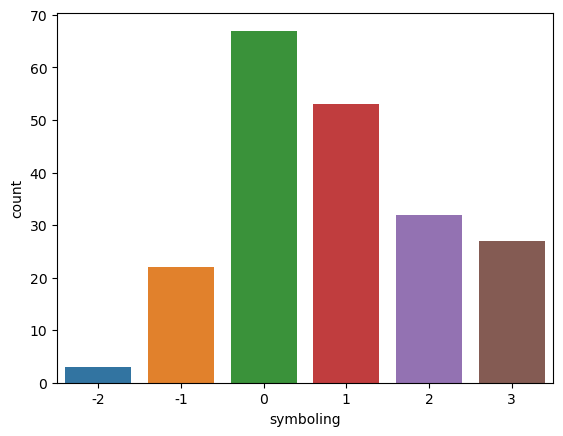

In [21]:
sns.countplot(car_df['symboling'])

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

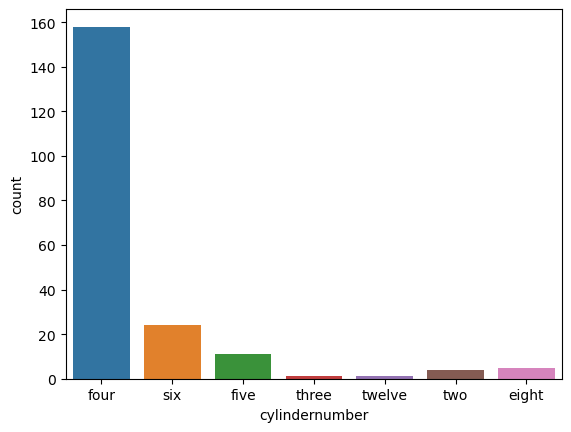

In [22]:
sns.countplot(car_df['cylindernumber'])

<AxesSubplot:title={'center':'Door Number vs Price'}, xlabel='cylindernumber', ylabel='price'>

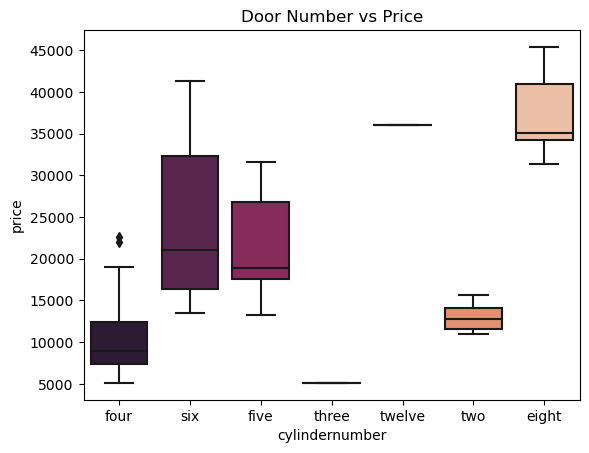

In [23]:
plt.title('Door Number vs Price')
sns.boxplot(x=car_df['cylindernumber'], y=car_df['price'], palette=("rocket"))

<AxesSubplot:title={'center':'Door Number vs Price'}, xlabel='doornumber', ylabel='price'>

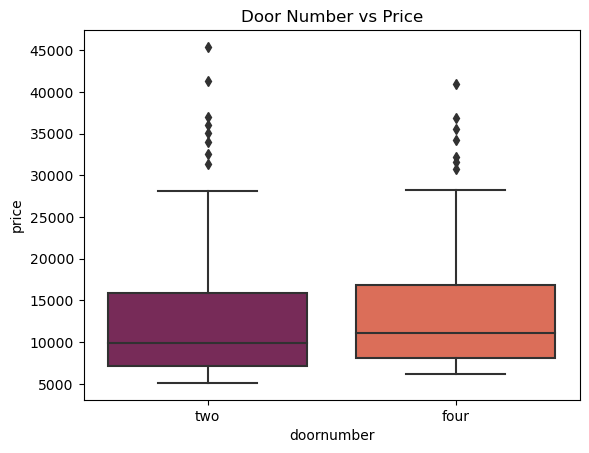

In [24]:
plt.title('Door Number vs Price')
sns.boxplot(x=car_df['doornumber'], y=car_df['price'], palette=("rocket"))

Text(0.5, 1.0, 'Aspiration vs Price')

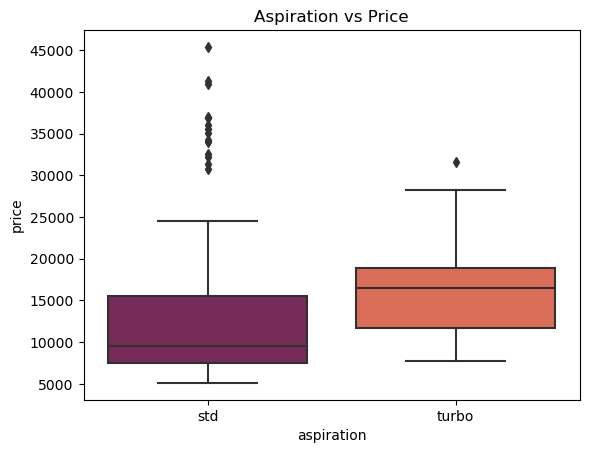

In [25]:
sns.boxplot(x=car_df.aspiration, y=car_df.price, palette=("rocket"))
plt.title('Aspiration vs Price')

Text(0.5, 1.0, 'Drive Wheel vs Price')

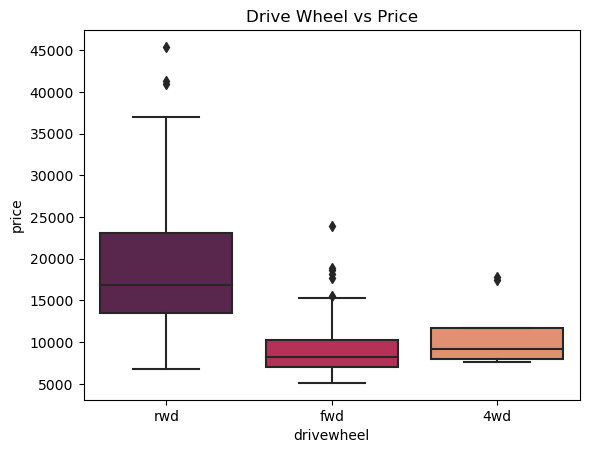

In [26]:
sns.boxplot(x=car_df.drivewheel, y=car_df.price, palette=("rocket"))
plt.title('Drive Wheel vs Price')

In [27]:
cars_df = car_df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'carlength','carwidth']]
cars_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


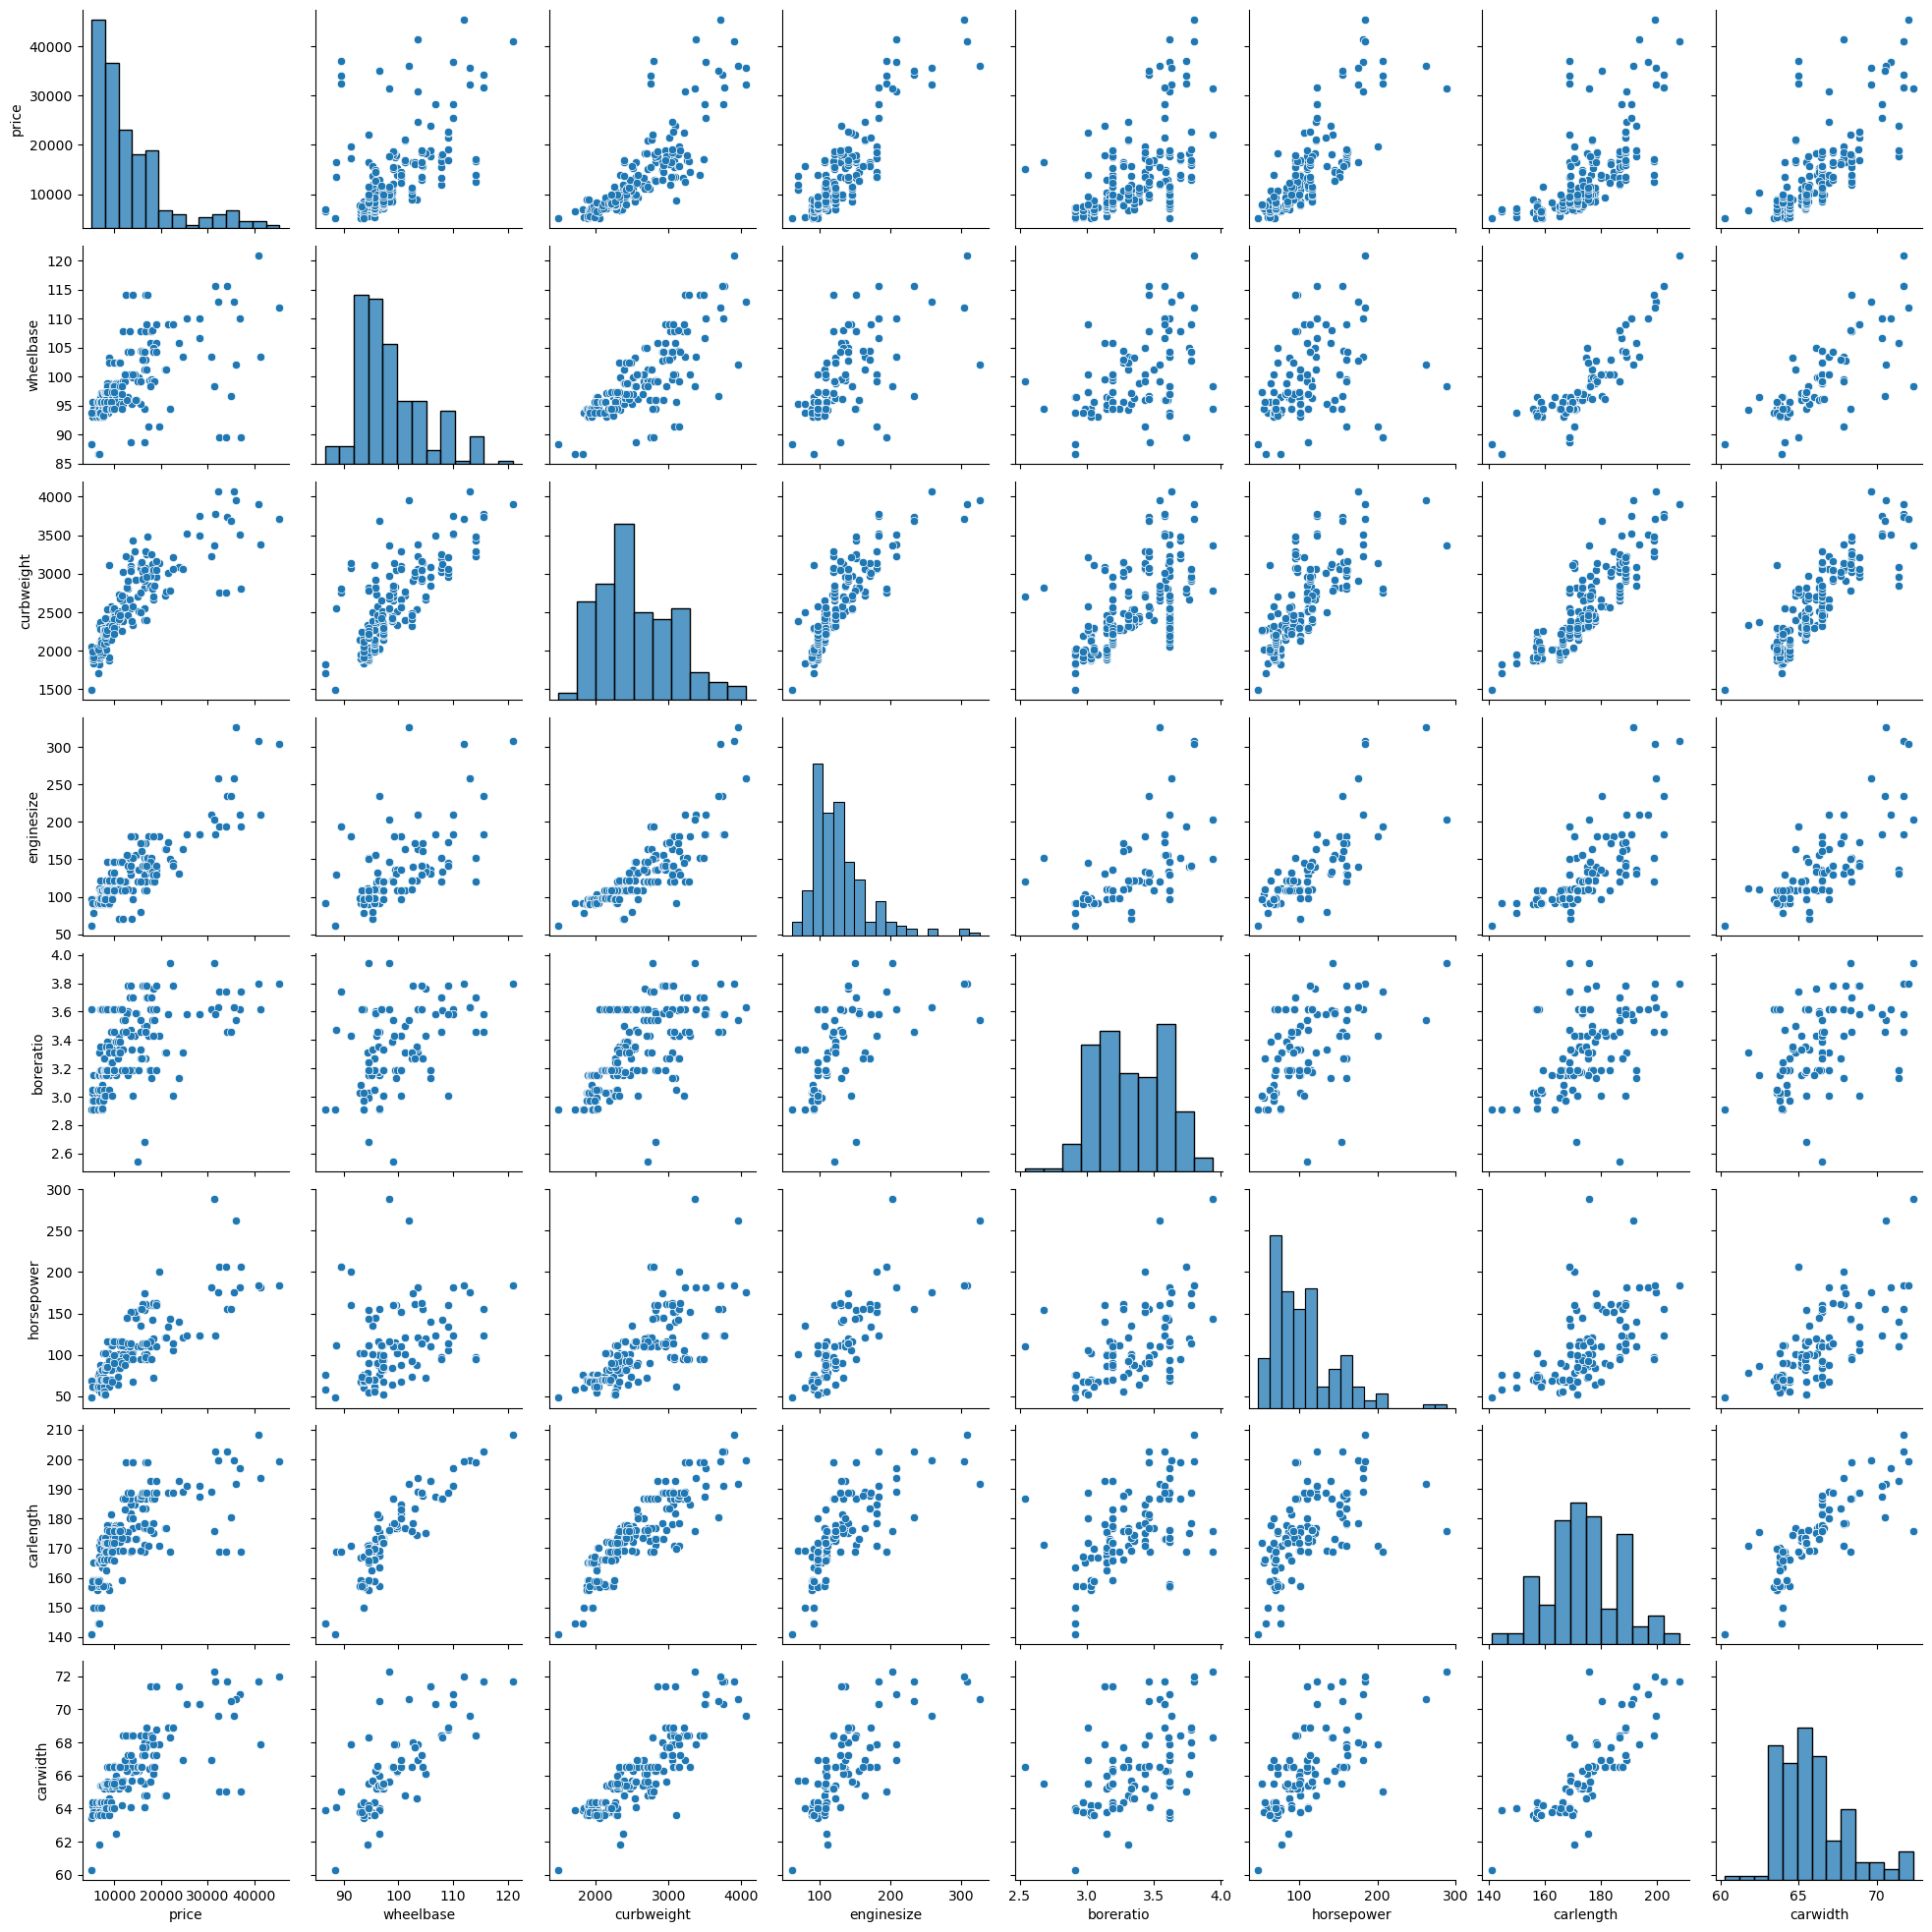

In [28]:
sns.pairplot(cars_df)

In [29]:
#Using Label Encoder for categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

car_df['fueltype'] = encoder.fit_transform(car_df['fueltype'])
car_df['aspiration'] = encoder.fit_transform(car_df['aspiration'])
car_df['enginelocation'] = encoder.fit_transform(car_df['enginelocation'])
car_df['drivewheel'] = encoder.fit_transform(car_df['drivewheel'])
car_df['doornumber'] = encoder.fit_transform(car_df['doornumber'])

In [30]:
car_df.drop(['fuelsystem', 'cylindernumber', 'enginetype', 'carbody'], axis = 1, inplace = True)

In [31]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         204 non-null    int64  
 1   fueltype          204 non-null    int32  
 2   aspiration        204 non-null    int32  
 3   doornumber        204 non-null    int32  
 4   drivewheel        204 non-null    int32  
 5   enginelocation    204 non-null    int32  
 6   wheelbase         204 non-null    float64
 7   carlength         204 non-null    float64
 8   carwidth          204 non-null    float64
 9   carheight         204 non-null    float64
 10  curbweight        204 non-null    int64  
 11  enginesize        204 non-null    int64  
 12  boreratio         204 non-null    float64
 13  stroke            204 non-null    float64
 14  compressionratio  204 non-null    float64
 15  horsepower        204 non-null    int64  
 16  peakrpm           204 non-null    int64  
 1

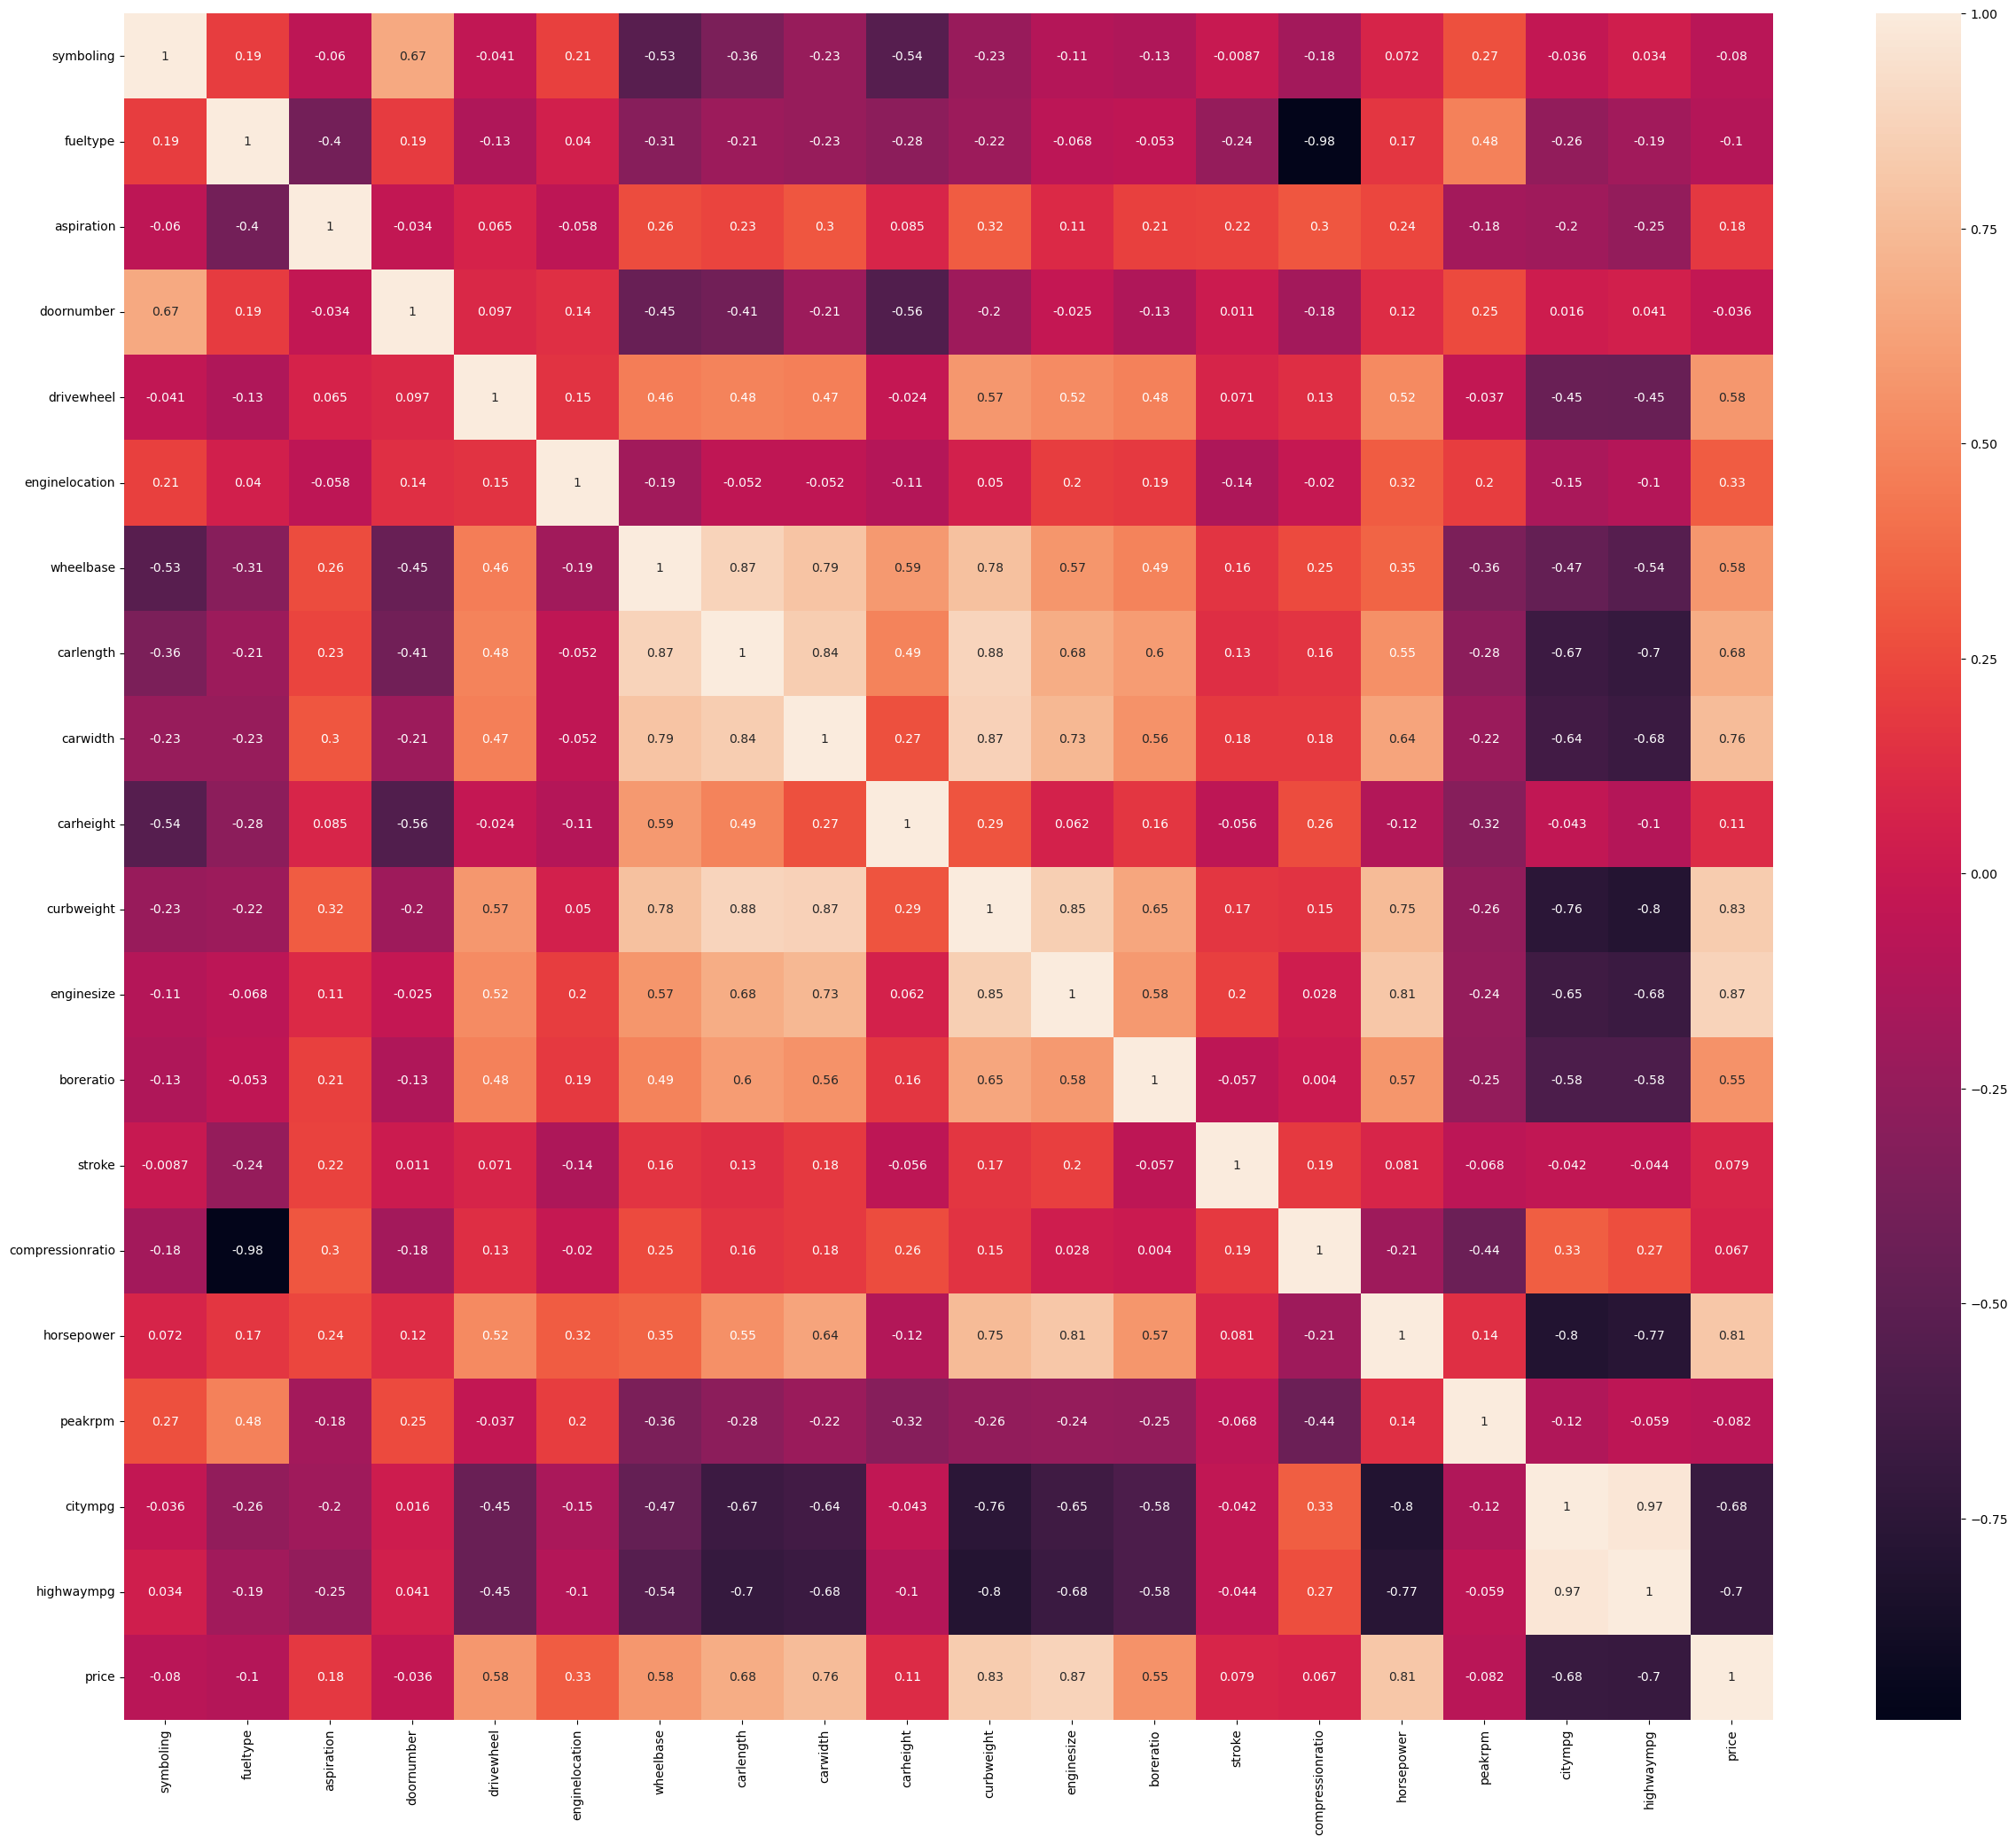

In [32]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(car_df.corr(), annot = True)
plt.show()

**Observation :**
      Highly correlated variables to price are - **curbweight, enginesize, horsepower,carwidth and highend**.

### Checking for outliers :

wheelbase


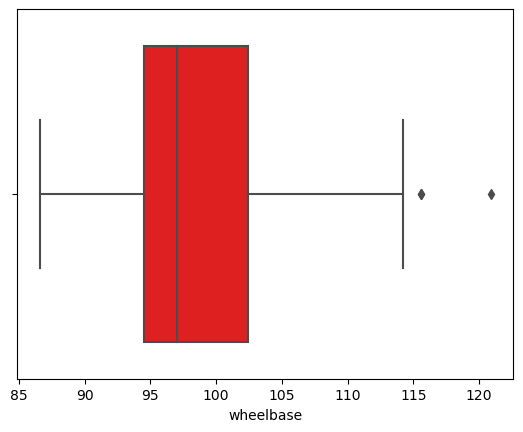

carlength


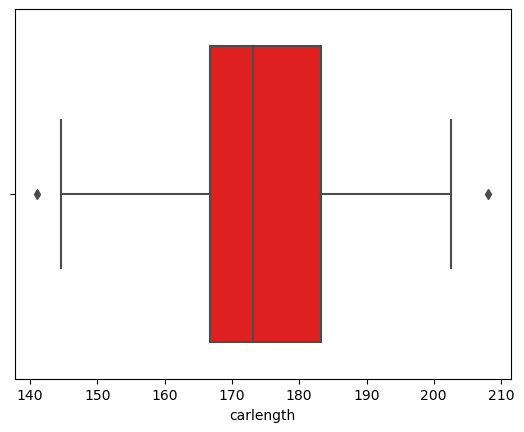

carwidth


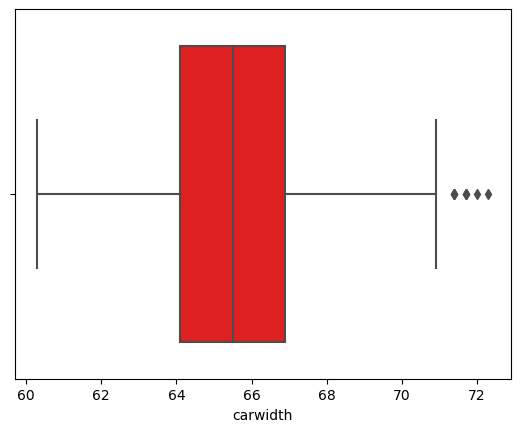

carheight


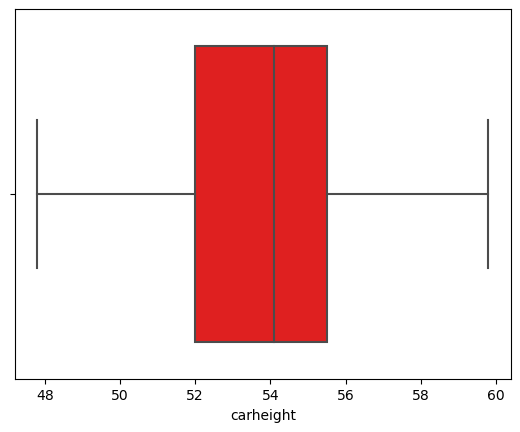

curbweight


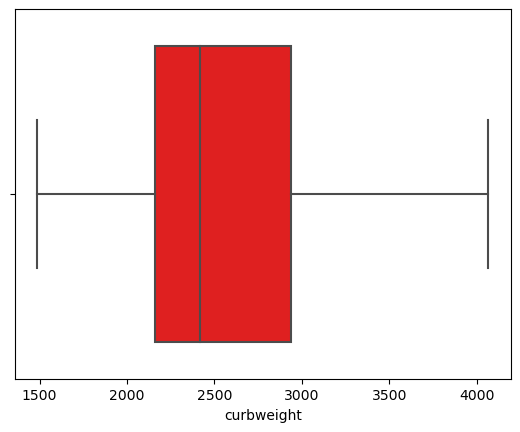

enginesize


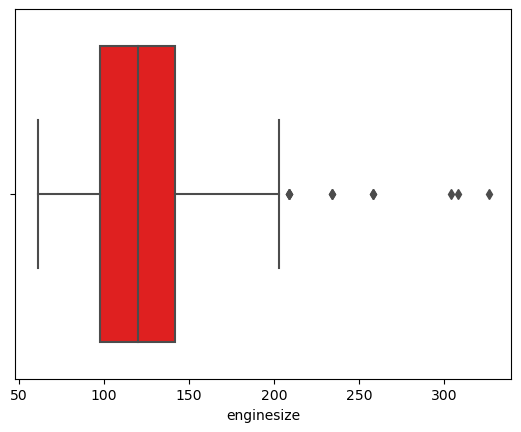

boreratio


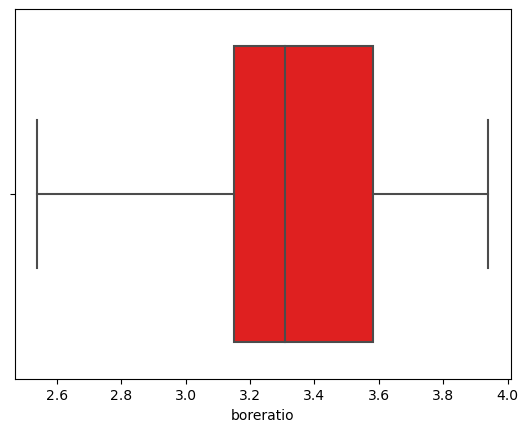

stroke


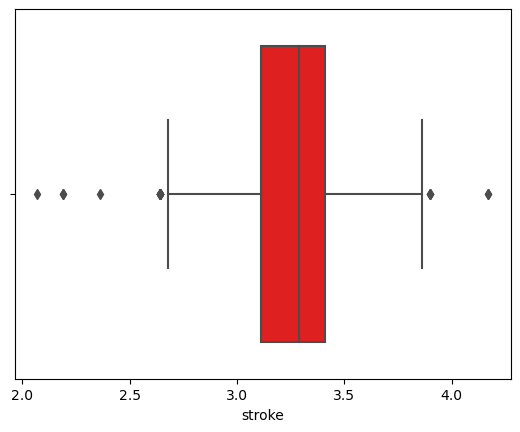

compressionratio


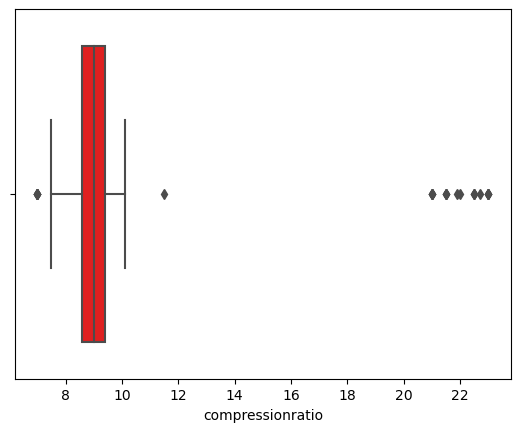

horsepower


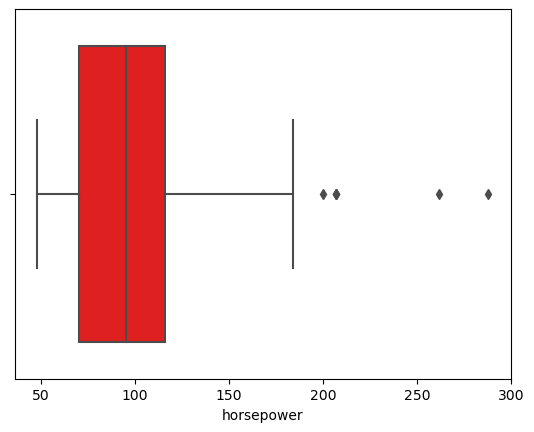

peakrpm


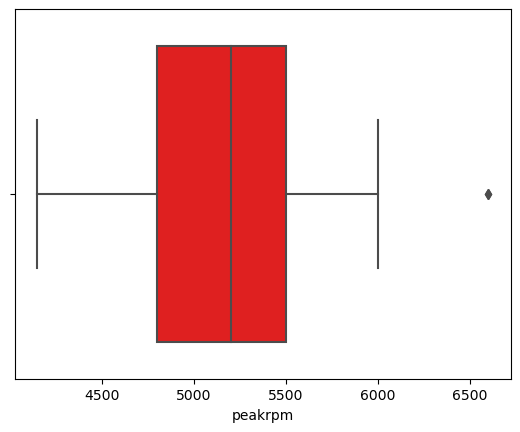

citympg


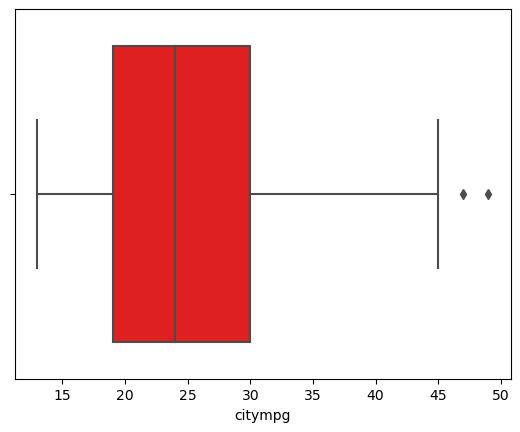

highwaympg


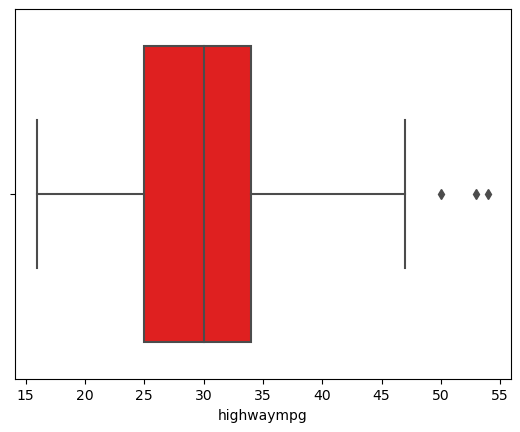

price


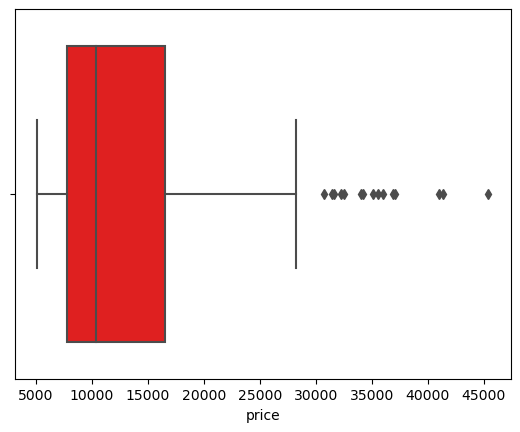

In [33]:
for col in car_df.iloc[:,6:].columns:
    print(col)
    sns.boxplot(x = car_df[col], data = car_df, color = 'red')
    plt.show()

In [34]:
def Outlier(var):
    for x in var.iloc[:, 6:].columns:
        Q1 = var[x].quantile(0.25)
        Q3 = var[x].quantile(0.75)
        IQR = Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x] = np.where(var[x].values > Upper, Upper, var[x].values)
        var.loc[:,x] = np.where(var[x].values < Lower, Lower, var[x].values)
    return var
df_car = Outlier(car_df)

wheelbase


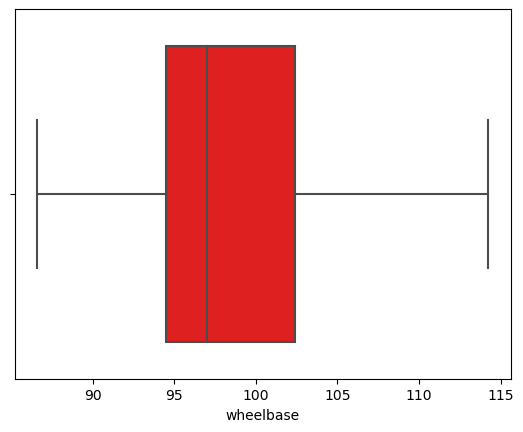

carlength


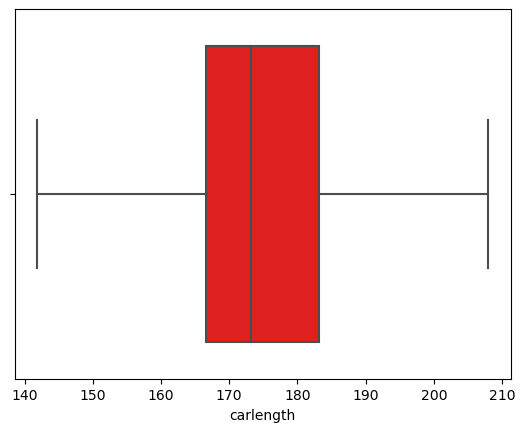

carwidth


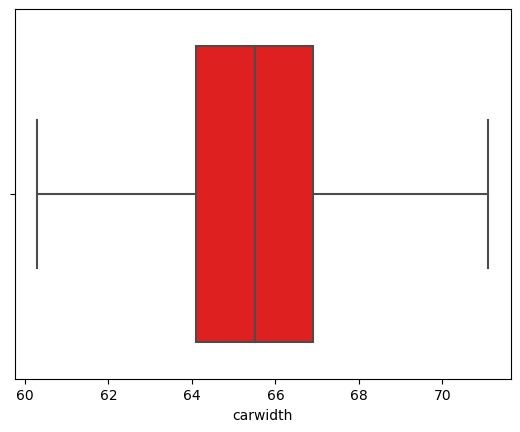

carheight


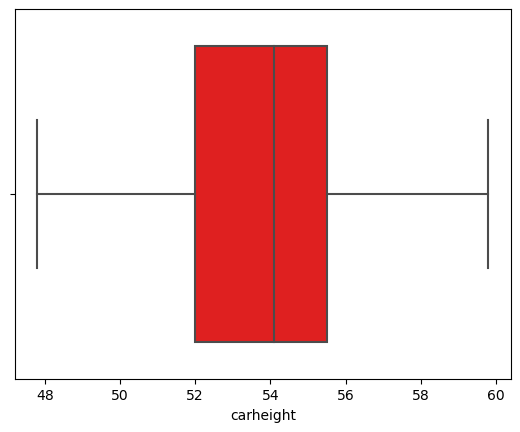

curbweight


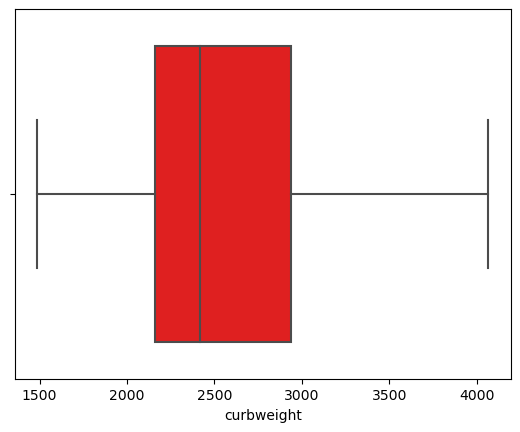

enginesize


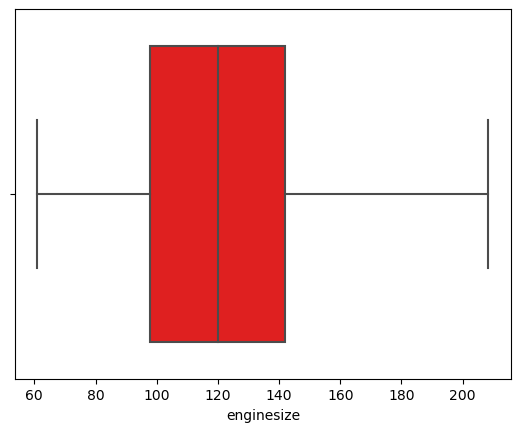

boreratio


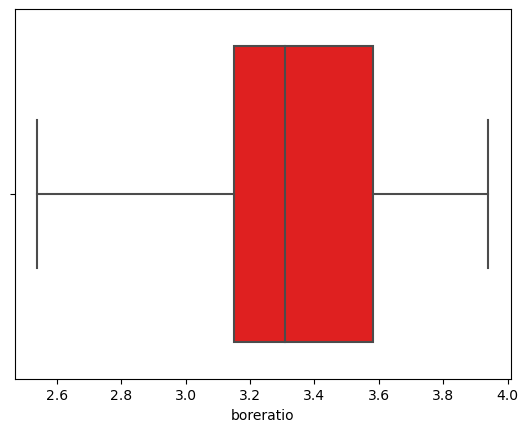

stroke


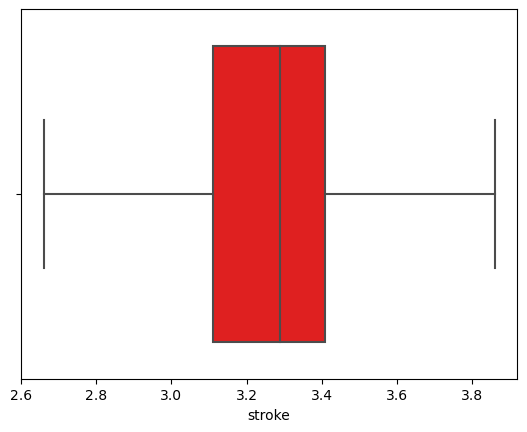

compressionratio


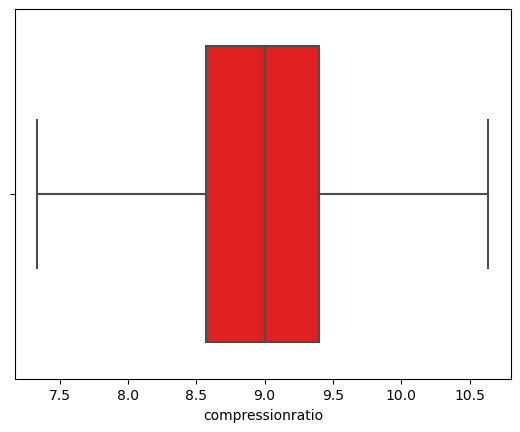

horsepower


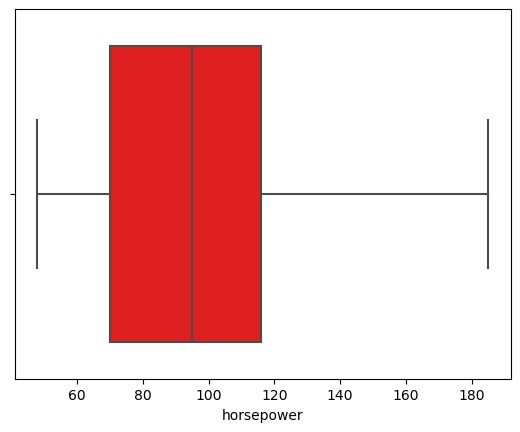

peakrpm


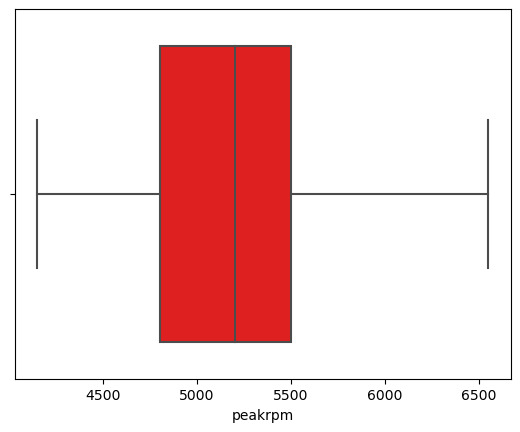

citympg


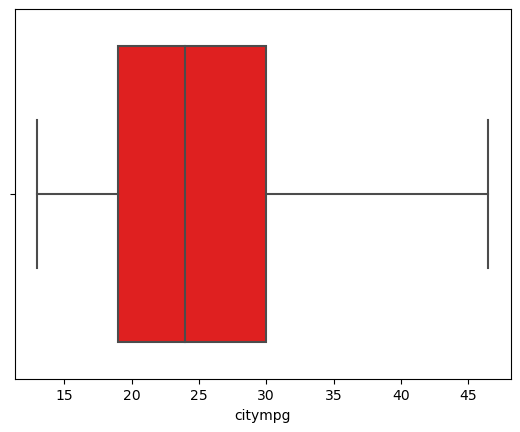

highwaympg


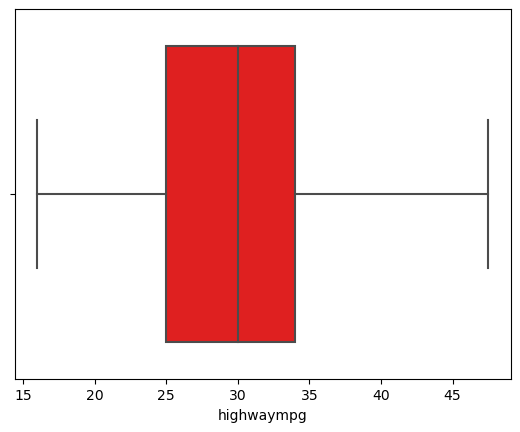

price


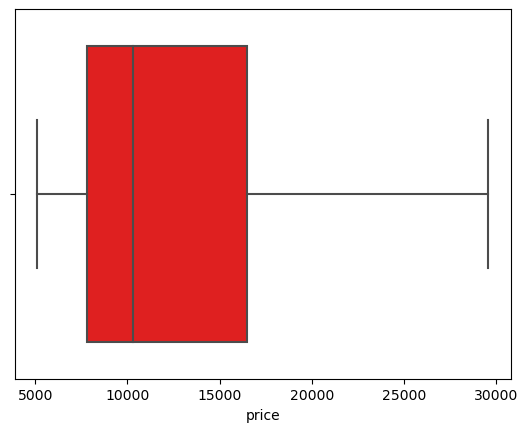

In [35]:
for col in df_car.iloc[:,6:].columns:
    print(col)
    sns.boxplot(x = df_car[col], data = df_car, color = 'red')
    plt.show()

In [36]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         204 non-null    int64  
 1   fueltype          204 non-null    int32  
 2   aspiration        204 non-null    int32  
 3   doornumber        204 non-null    int32  
 4   drivewheel        204 non-null    int32  
 5   enginelocation    204 non-null    int32  
 6   wheelbase         204 non-null    float64
 7   carlength         204 non-null    float64
 8   carwidth          204 non-null    float64
 9   carheight         204 non-null    float64
 10  curbweight        204 non-null    float64
 11  enginesize        204 non-null    float64
 12  boreratio         204 non-null    float64
 13  stroke            204 non-null    float64
 14  compressionratio  204 non-null    float64
 15  horsepower        204 non-null    float64
 16  peakrpm           204 non-null    float64
 1

### Train Test Spliit :

In [37]:
X = df_car.drop('price', axis = 1)
Y = df_car['price']

In [38]:
X

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,2,0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0000,111.0,5000.0,21.0,27.0
1,3,1,0,1,2,0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0000,111.0,5000.0,21.0,27.0
2,1,1,0,1,2,0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0000,154.0,5000.0,19.0,26.0
3,2,1,0,0,1,0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0000,102.0,5500.0,24.0,30.0
4,2,1,0,0,0,0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0000,115.0,5500.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,2,0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5000,114.0,5400.0,23.0,28.0
201,-1,1,1,0,2,0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7000,160.0,5300.0,19.0,25.0
202,-1,1,0,0,2,0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8000,134.0,5500.0,18.0,23.0
203,-1,0,1,0,2,0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,10.6375,106.0,4800.0,26.0,27.0


In [39]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 204, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [41]:
#checking the shape after train-test split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 19)
(62, 19)
(142,)
(62,)


### Feature Selection :

In [42]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, Y)

selected_feat = X.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)


Total Features Selected are 3
Threshold set by Model: 0.05
Important Features: ['curbweight', 'enginesize', 'highwaympg']


### Feature Importance :

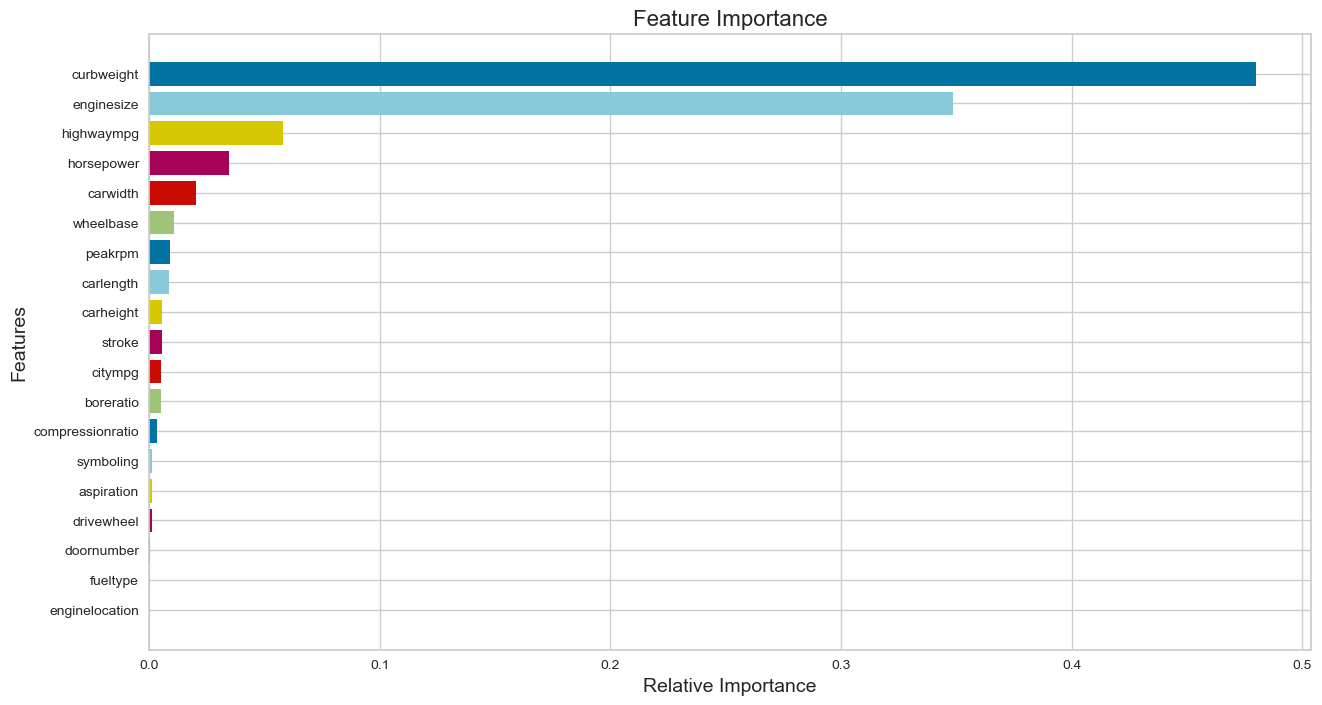

In [43]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(X, Y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importance', size=16)
plt.show()

###  Data Standardization :

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###  Modelling :

In [45]:
from sklearn import metrics

### Linear Regression :

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

**Model Evaluation :**

In [47]:
#Predicting on train data
y_pred_lin_train = lin_reg.predict(x_train)

#Predicting on test data
y_pred_lin_test = lin_reg.predict(x_test)

In [48]:
#R2 score on train dataset
R2_score_Linear_train = metrics.r2_score(y_train, y_pred_lin_train)
R2_score_Linear_train

0.900703951705767

In [49]:
#R2 score on test dataset
R2_score_Linear_test = metrics.r2_score(y_test, y_pred_lin_test)
R2_score_Linear_test

0.8154815904479515

### Decision Tree Regressor :

In [50]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

**Model Evaluation :**

In [51]:
#Predicting on train data
y_pred_dtree_train = dtree.predict(x_train)

#Predicting on test data
y_pred_dtree_test = dtree.predict(x_test)

In [52]:
#R2 score on train dataset
R2_score_dtree_train = metrics.r2_score(y_train, y_pred_dtree_train)
R2_score_dtree_train

0.9993057461216796

In [53]:
#R2 score on test dataset
R2_score_dtree_test = metrics.r2_score(y_test, y_pred_dtree_test)
R2_score_dtree_test

0.8850358489708293

### Random Forest Regressor :

In [54]:
from sklearn.ensemble import RandomForestRegressor

clf_rand = RandomForestRegressor()
clf_rand.fit(x_train, y_train)

RandomForestRegressor()

**Model Evaluation :**

In [55]:
#Predicting on train data
y_pred_rf_train = clf_rand.predict(x_train)

#Predicting on test data
y_pred_rf_test = clf_rand.predict(x_test)

In [56]:
#R2 score on train dataset
R2_score_rf_train = metrics.r2_score(y_train, y_pred_rf_train)
R2_score_rf_train

0.9886719330400215

In [57]:
#R2 score on test dataset
R2_score_rf_test = metrics.r2_score(y_test, y_pred_rf_test)
R2_score_rf_test

0.9038224022190768

### KNeighbors :

In [58]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

**Model Evaluation :**

In [59]:
#Predicting on train data
y_pred_kn_train = knn.predict(x_train)

#Predicting on test data
y_pred_kn_test = knn.predict(x_test)

In [60]:
#R2 score on train dataset
R2_score_Knn_train = metrics.r2_score(y_train, y_pred_kn_train)
R2_score_Knn_train

0.9283096233961607

In [61]:
#R2 score on test dataset
R2_score_Knn_test = metrics.r2_score(y_test, y_pred_kn_test)
R2_score_Knn_test

0.8069840011154997

### Ada Boost Regressor :

In [62]:
from sklearn.ensemble import AdaBoostRegressor

ada_tree = AdaBoostRegressor(base_estimator = dtree)
ada_tree.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

**Model Evaluation :**

In [63]:
#Predicting on train data
y_pred_ada_train = ada_tree.predict(x_train)

#Predicting on test data
y_pred_ada_test = ada_tree.predict(x_test)

In [64]:
#R2 score on train dataset
R2_score_adaTree_train = metrics.r2_score(y_train, y_pred_ada_train)
R2_score_adaTree_train

0.998058605596413

In [65]:
#R2 score on test dataset
R2_score_adaTree_test = metrics.r2_score(y_test, y_pred_ada_test)
R2_score_adaTree_test

0.8907537862889202

### Bagging Regressor :

In [66]:
clf_bag = RandomForestRegressor()

In [67]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(base_estimator = clf_bag)
bag_clf.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor())

**Model Evaluation :**

In [68]:
#Predicting on train data
y_pred_bag_train = bag_clf.predict(x_train)

#Predicting on test data
y_pred_bag_test = bag_clf.predict(x_test)

In [69]:
#R2 score on train dataset
R2_score_bag_train = metrics.r2_score(y_train, y_pred_bag_train)
R2_score_bag_train

0.9658357812787587

In [70]:
#R2 score on test dataset
R2_score_bag_test = metrics.r2_score(y_test, y_pred_bag_test)
R2_score_bag_test

0.8905795760073422

### XGBRegressor :

In [71]:
import xgboost as xgb

xgb_cl = xgb.XGBRegressor()
xgb_cl.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

**Model Evaluation :**

In [72]:
#Predicting on train data
y_pred_xg_train = xgb_cl.predict(x_train)

#Predicting on test data
y_pred_xg_test = xgb_cl.predict(x_test)

In [73]:
#R2 score on train dataset
R2_score_xg_train = metrics.r2_score(y_train, y_pred_xg_train)
R2_score_xg_train

0.9993056521591921

In [74]:
#R2 score on test dataset
R2_score_xg_test = metrics.r2_score(y_test, y_pred_xg_test)
R2_score_xg_test

0.8786099445277052

In [75]:
models = pd.DataFrame({ 'Model': ['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor','Bagging Regressor', 'KNeighbors', 'XGBoost Regressor'],
                       'Training R2_Score': [R2_score_Linear_train, R2_score_dtree_train, R2_score_adaTree_train,
                                         R2_score_rf_train, R2_score_bag_train,R2_score_Knn_train,
                                            R2_score_xg_train],
                       
                       'Testing R2_Score': [R2_score_Linear_test, R2_score_dtree_test, R2_score_adaTree_test, R2_score_rf_test, R2_score_bag_test,
                                        R2_score_Knn_test, R2_score_xg_test]})
models.sort_values(by = ['Training R2_Score', 'Testing R2_Score'], ascending = False, ignore_index = True)

,Model,Training R2_Score,Testing R2_Score
0,Decision Tree Regressor,0.999306,0.885036
1,XGBoost Regressor,0.999306,0.878610
2,ADABoost Regressor,0.998059,0.890754
3,Random Forest Regressor,0.988672,0.903822
4,Bagging Regressor,0.965836,0.890580
5,KNeighbors,0.928310,0.806984
6,Linear Regressor,0.900704,0.815482


### Kfold Cross Validation :

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [77]:
Regressors = []

Regressors.append(LinearRegression())
Regressors.append(DecisionTreeRegressor())
Regressors.append(AdaBoostRegressor())
Regressors.append(RandomForestRegressor())
Regressors.append(BaggingRegressor(base_estimator = clf_bag))
Regressors.append(KNeighborsRegressor(n_neighbors= 3))
Regressors.append(xgb.XGBRegressor())

In [78]:
cv_results = []

for Regressor in Regressors:
    cv_results.append(cross_val_score(Regressor, x_train, y_train, scoring = 'r2', cv = 5))

In [79]:
cv_results

[array([0.78294556, 0.8860091 , 0.79773236, 0.86683123, 0.89816535]),
 array([0.76809462, 0.84057168, 0.86161282, 0.92044817, 0.92334781]),
 array([0.79536081, 0.94376551, 0.88943981, 0.9125694 , 0.93976472]),
 array([0.84049293, 0.94426819, 0.90151929, 0.93549573, 0.95401252]),
 array([0.80100197, 0.92435591, 0.87283118, 0.87251942, 0.93662304]),
 array([0.72194117, 0.90312707, 0.77252296, 0.79197142, 0.78486584]),
 array([0.8355556 , 0.9227944 , 0.91296136, 0.91132121, 0.93023768])]

In [80]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [81]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'Bagging Regressor', 'KNeighbors', 'XGBoost Regressor']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.915158,0.041308,Random Forest Regressor
1,0.902574,0.034205,XGBoost Regressor
2,0.896180,0.054116,ADABoost Regressor
3,0.881466,0.047981,Bagging Regressor
4,0.862815,0.057365,Decision Tree Regressor
5,0.846337,0.047034,Linear Regressor
6,0.794886,0.059407,KNeighbors


### Tuning on Random Forest Regressor :

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [84]:
rf = RandomForestRegressor()

In [85]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [86]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [87]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [88]:
rf = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt')

In [89]:
#Predicting on train data
y_pred_rfg_train = rf.predict(x_train)

#Predicting on test data
y_pred_rfg_test = rf.predict(x_test)

In [90]:
#R2 score on train dataset
R2_score_rfg_train = metrics.r2_score(y_train, y_pred_rfg_train)
R2_score_rfg_train

0.9903734369957093

In [91]:
#R2 score on test dataset
R2_score_rfg_test = metrics.r2_score(y_test, y_pred_rfg_test)
R2_score_rfg_test

0.9108185465995599

By tuning **Random Forest** using **GridSearchCV** **R2_score for test set is 0.91.**